In [83]:
#komórka 0 - importy, rozszerzanie okien
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [84]:
#komórka 1 - wczytanie pliku
births = pd.read_csv('_births.csv')

In [85]:
#komórka 2 - podgląd kawałka danych
births.head()

,time,births_number[number]
0,2000-03-01 12:00:00.000000,7639
1,2000-06-01 12:00:00.000000,7365
2,2000-09-01 12:00:00.000000,7174
3,2000-12-01 12:00:00.000000,6979
4,2001-03-01 12:00:00.000000,7496


In [86]:
#komórka 3 - podgląd typów danych
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   time                   52 non-null     object
 1   births_number[number]  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [87]:
#komórka 4 przykładowy element kolumny - sprawdzenie formatu i typu zmiennej
births['time'] [0] 

'2000-03-01 12:00:00.000000'

In [88]:
#komórka 5 - transformacja wekotru czasu do postaci stempli czasowych
births['time'] = pd.to_datetime(births['time'], format='%Y-%m-%d %H:%M:%S')

In [89]:
#komórka 6 - wyświetlenie nazw kolumn
births.columns

Index(['time', 'births_number[number]'], dtype='object')

In [90]:
#komórka 7 - zmiana nazwy kolumny
births = births.rename(columns={'births_number[number]':'bnum'})
births.head()

,time,bnum
0,2000-03-01 12:00:00,7639
1,2000-06-01 12:00:00,7365
2,2000-09-01 12:00:00,7174
3,2000-12-01 12:00:00,6979
4,2001-03-01 12:00:00,7496


<AxesSubplot:title={'center':'Zmiana liczby urodzeń na przestrzeni lat'}, xlabel='time', ylabel='bnum'>

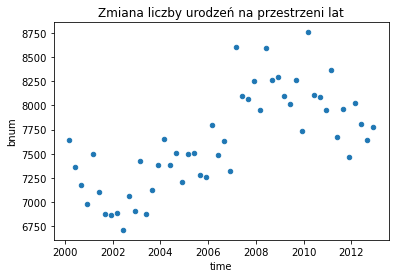

In [91]:
#komórka 8 - wykres serii danych za pomocą pandasa
births.plot(kind='scatter', x='time', y='bnum', title='Zmiana liczby urodzeń na przestrzeni lat', subplots=False) 

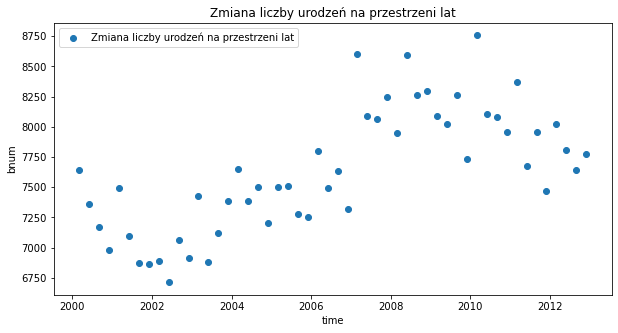

In [92]:
#komórka 9 - wykres za pomocą matplotliba
fig, ax = plt.subplots(figsize=(10,5))
ax=plt.scatter(x=births['time'], y=births['bnum'] ) 
plt.title("Zmiana liczby urodzeń na przestrzeni lat")
plt.legend(["Zmiana liczby urodzeń na przestrzeni lat"])
plt.xlabel("time")
plt.ylabel("bnum")
plt.show()

In [93]:
#komórka 10 - dodanie kolumny w oparciu o już istniejącą
births2 = births.copy() 
births2['bnum2'] = births2['bnum']*0.8+10
births2.head()


,time,bnum,bnum2
0,2000-03-01 12:00:00,7639,6121.2
1,2000-06-01 12:00:00,7365,5902.0
2,2000-09-01 12:00:00,7174,5749.2
3,2000-12-01 12:00:00,6979,5593.2
4,2001-03-01 12:00:00,7496,6006.8


<AxesSubplot:title={'center':'Zmiana liczby urodzeń na przestrzeni lat'}, xlabel='time'>

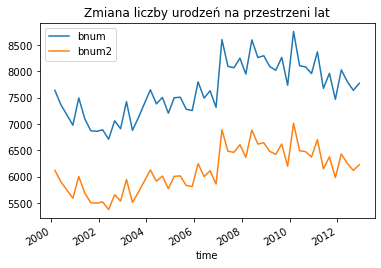

In [94]:
#komórka 11 - wykres przy 2 seriach danych na bazie ramki danych
births2.plot(x='time',y=['bnum','bnum2'], kind='line', title='Zmiana liczby urodzeń na przestrzeni lat') #linia działa - zmienić na scatter i nie działa



<AxesSubplot:title={'center':'Zmiana liczby urodzeń na przestrzeni lat'}, xlabel='time', ylabel='bnum2'>

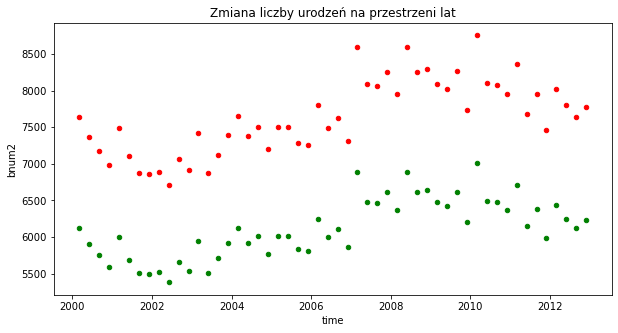

In [95]:
#komórka 12 - wykres przy 2 seriach danych na bazie ramki danych
fig, ax = plt.subplots(figsize=(10,5))
births2.plot(x='time',y='bnum', kind='scatter', title='Zmiana liczby urodzeń na przestrzeni lat', ax=ax, color='red') 
births2.plot(x='time',y='bnum2', kind='scatter', title='Zmiana liczby urodzeń na przestrzeni lat',ax=ax, color='green') 


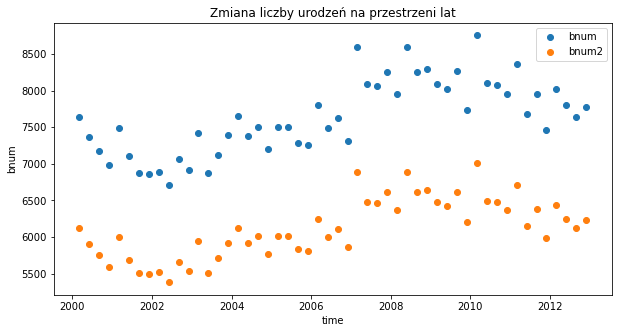

In [96]:
#komórka 13 - wykres za pomocą matplotliba
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data=births2, x='time', y='bnum', axes=ax ) 
plt.scatter(data=births2, x='time', y='bnum2', axes=ax ) 

plt.title("Zmiana liczby urodzeń na przestrzeni lat")
plt.legend(["bnum", "bnum2"])
plt.xlabel("time")
plt.ylabel("bnum")
plt.show()


<AxesSubplot:ylabel='Frequency'>

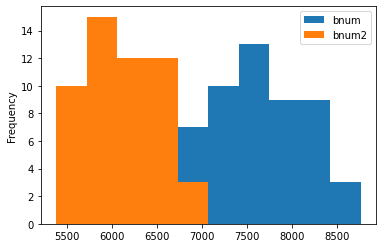

In [97]:
#komórka 14 - wykres histogramu
births2.plot(x='time',y=['bnum','bnum2'], kind='hist')

<AxesSubplot:ylabel='Density'>

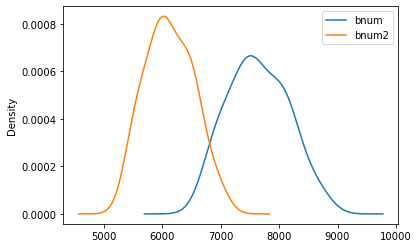

In [98]:
#komórka 15 - wykres kde
births2.plot(x='time',y=['bnum','bnum2'], kind='kde')

<AxesSubplot:>

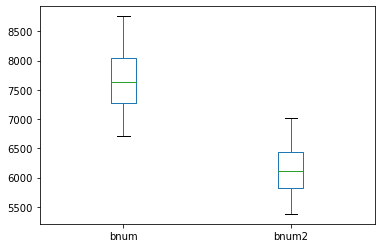

In [99]:
#komórka 16 - wykres boxplotu
births2.plot(x='time',y=['bnum','bnum2'], kind='box')

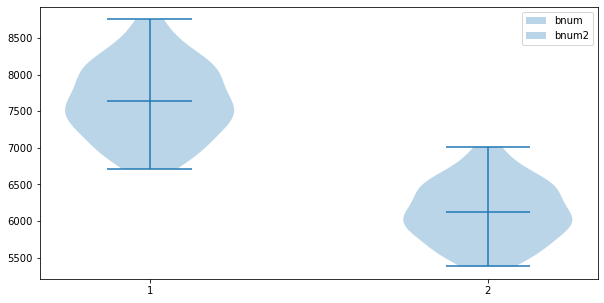

In [100]:
#komórka 17 - wykres skrzypcowy
fig, ax = plt.subplots(figsize=(10,5))
ax.violinplot(dataset=births2.iloc[:,1:], showmeans=True)
plt.legend(["bnum", "bnum2"])

ax.set_xticks([1,2])
    
plt.show() 

In [101]:
##komórka 18 - podstaweowe statystyki ramek danych
stats1 = births2.describe()
stats1

,bnum,bnum2
count,52.000000,52.000000
mean,7639.750000,6121.800000
std,506.576548,405.261238
min,6713.000000,5380.400000
25%,7275.000000,5830.000000
50%,7635.000000,6118.000000
75%,8037.250000,6439.800000
max,8756.000000,7014.800000


In [102]:
#komórka 19 - przykład dodawania nowego wiersza do tabeli
stats1.loc['aaa',:] = [1,2] #loc w ogólności może służyć również do adresowania zakresu pól z tabeli po nazwie/numerze wierszy i nazwie/numerze kolumn
stats1

,bnum,bnum2
count,52.000000,52.000000
mean,7639.750000,6121.800000
std,506.576548,405.261238
min,6713.000000,5380.400000
25%,7275.000000,5830.000000
50%,7635.000000,6118.000000
75%,8037.250000,6439.800000
max,8756.000000,7014.800000
aaa,1.000000,2.000000


In [103]:
#komórka 20 -dodawanie kolumny danych
stats1['test1'] = [x**0.5 for x in stats1['bnum']]
stats1

,bnum,bnum2,test1
count,52.000000,52.000000,7.211103
mean,7639.750000,6121.800000,87.405663
std,506.576548,405.261238,22.507255
min,6713.000000,5380.400000,81.932899
25%,7275.000000,5830.000000,85.293611
50%,7635.000000,6118.000000,87.378487
75%,8037.250000,6439.800000,89.650711
max,8756.000000,7014.800000,93.573501
aaa,1.000000,2.000000,1.000000


In [104]:
#komórka 21 -usuwanie kolumny
stats1 = stats1.drop(columns='test1')
stats1

,bnum,bnum2
count,52.000000,52.000000
mean,7639.750000,6121.800000
std,506.576548,405.261238
min,6713.000000,5380.400000
25%,7275.000000,5830.000000
50%,7635.000000,6118.000000
75%,8037.250000,6439.800000
max,8756.000000,7014.800000
aaa,1.000000,2.000000


In [105]:
#komórka 22 -dodawanie innych statystyk niż z komendy describe w oparciu o kolumny ramki pierwotnej
#tu percentyl 95, ale może być też metoda skew() lub kurtosis() -do obliczenia skośności i kurtozy(spłaszczenia)
#ale też mean(), czy std() - średnia i odchylenie standardowe
stats1.loc['p95'] = [births2[col].quantile(0.95) for col in births2.iloc[:,1:].columns]
stats1

,bnum,bnum2
count,52.000000,52.000000
mean,7639.750000,6121.800000
std,506.576548,405.261238
min,6713.000000,5380.400000
25%,7275.000000,5830.000000
50%,7635.000000,6118.000000
75%,8037.250000,6439.800000
max,8756.000000,7014.800000
aaa,1.000000,2.000000
p95,8472.150000,6787.720000


In [106]:
#komórka 23 -druga metoda dostępu do kolejnych kolumn i wierszy
for name,x in births2.iloc[:,1:].items(): #w starszej wersji pandasa iteritems zamiast items
    print(x.max())

8756
7014.8


In [107]:
#komórka 24 -dodawnie etykiety danych z warunkiem if else
births2['type1'] = ['big' if x>7000 else 'small' for x in births2['bnum']]
births2.head(15)

,time,bnum,bnum2,type1
0,2000-03-01 12:00:00,7639,6121.2,big
1,2000-06-01 12:00:00,7365,5902.0,big
2,2000-09-01 12:00:00,7174,5749.2,big
3,2000-12-01 12:00:00,6979,5593.2,small
4,2001-03-01 12:00:00,7496,6006.8,big
5,2001-06-01 12:00:00,7101,5690.8,big
6,2001-09-01 12:00:00,6873,5508.4,small
7,2001-12-01 12:00:00,6863,5500.4,small
8,2002-03-01 12:00:00,6891,5522.8,small
9,2002-06-01 12:00:00,6713,5380.4,small


In [108]:
#komórka 25 -filtrowanie danych po etykiecie
births2[births2['type1'] == 'small']

,time,bnum,bnum2,type1
3,2000-12-01 12:00:00,6979,5593.2,small
6,2001-09-01 12:00:00,6873,5508.4,small
7,2001-12-01 12:00:00,6863,5500.4,small
8,2002-03-01 12:00:00,6891,5522.8,small
9,2002-06-01 12:00:00,6713,5380.4,small
11,2002-12-01 12:00:00,6912,5539.6,small
13,2003-06-01 12:00:00,6881,5514.8,small


In [109]:
#komórka 26 - alternatywne dodawnie etykiety danych z warunkiem if else
births2 = births2.drop(columns='type1') #na potrzeby przykładu, żeby mieć ramkę bez tej kolumny

births2['type1'] =pd.NA #tworzenie pustej kolumny
births2.loc[births2['bnum']>7000,'type1'] = 'big' #warunkowe osadzenie elementów

births2.head(15)

,time,bnum,bnum2,type1
0,2000-03-01 12:00:00,7639,6121.2,big
1,2000-06-01 12:00:00,7365,5902.0,big
2,2000-09-01 12:00:00,7174,5749.2,big
3,2000-12-01 12:00:00,6979,5593.2,<NA>
4,2001-03-01 12:00:00,7496,6006.8,big
5,2001-06-01 12:00:00,7101,5690.8,big
6,2001-09-01 12:00:00,6873,5508.4,<NA>
7,2001-12-01 12:00:00,6863,5500.4,<NA>
8,2002-03-01 12:00:00,6891,5522.8,<NA>
9,2002-06-01 12:00:00,6713,5380.4,<NA>


In [110]:
#komórka 27 -groupowanie po etykietach i generacja miar grup
births2['type1']= births2['type1'].fillna('small') #uzupełnienie pustych wartośći
births2.groupby('type1').mean()

,bnum,bnum2
type1,,
big,7759.000000,6217.200000
small,6873.142857,5508.514286


In [111]:
#komórka 28 -funckja lambda - przykłąd zastosowania
births2['month']= births2['time'].apply(lambda x:x.month) #dodanie nowej kolumny do grupowania
births2.head(10)

,time,bnum,bnum2,type1,month
0,2000-03-01 12:00:00,7639,6121.2,big,3
1,2000-06-01 12:00:00,7365,5902.0,big,6
2,2000-09-01 12:00:00,7174,5749.2,big,9
3,2000-12-01 12:00:00,6979,5593.2,small,12
4,2001-03-01 12:00:00,7496,6006.8,big,3
5,2001-06-01 12:00:00,7101,5690.8,big,6
6,2001-09-01 12:00:00,6873,5508.4,small,9
7,2001-12-01 12:00:00,6863,5500.4,small,12
8,2002-03-01 12:00:00,6891,5522.8,small,3
9,2002-06-01 12:00:00,6713,5380.4,small,6


In [112]:
#komórka 29 -bardziej złożone grupowanie
births2.groupby(['type1','month']).mean() #zamiast mean może być też suma, kwantyl, etc.

bnum        bnum2
type1 month                          
big   3      7942.000000  6363.600000
      6      7740.545455  6202.436364
      9      7671.250000  6147.000000
      12     7665.000000  6142.000000
small 3      6891.000000  5522.800000
      6      6797.000000  5447.600000
      9      6873.000000  5508.400000
      12     6918.000000  5544.400000

In [113]:
#komórka 30 - łączenie ramek danych przez dopisywanie poniżej
ex1 = births2[births2.index%4 == 0] #przykładowa ramka danych1
ex2 = births2[births2.index%8 == 0] #przykładowa ramka danych2
display(ex1) 
display(ex2)
ex3 = pd.concat([ex1,ex2])
display(ex3)

ex4 = ex3.reset_index(drop=True)
display(ex4)

,time,bnum,bnum2,type1,month
0,2000-03-01 12:00:00,7639,6121.2,big,3
4,2001-03-01 12:00:00,7496,6006.8,big,3
8,2002-03-01 12:00:00,6891,5522.8,small,3
12,2003-03-01 12:00:00,7425,5950.0,big,3
16,2004-03-01 12:00:00,7650,6130.0,big,3
20,2005-03-01 12:00:00,7499,6009.2,big,3
24,2006-03-01 12:00:00,7800,6250.0,big,3
28,2007-03-01 12:00:00,8602,6891.6,big,3
32,2008-03-01 12:00:00,7948,6368.4,big,3
36,2009-03-01 12:00:00,8092,6483.6,big,3


,time,bnum,bnum2,type1,month
0,2000-03-01 12:00:00,7639,6121.2,big,3
8,2002-03-01 12:00:00,6891,5522.8,small,3
16,2004-03-01 12:00:00,7650,6130.0,big,3
24,2006-03-01 12:00:00,7800,6250.0,big,3
32,2008-03-01 12:00:00,7948,6368.4,big,3
40,2010-03-01 12:00:00,8756,7014.8,big,3
48,2012-03-01 12:00:00,8027,6431.6,big,3


,time,bnum,bnum2,type1,month
0,2000-03-01 12:00:00,7639,6121.2,big,3
4,2001-03-01 12:00:00,7496,6006.8,big,3
8,2002-03-01 12:00:00,6891,5522.8,small,3
12,2003-03-01 12:00:00,7425,5950.0,big,3
16,2004-03-01 12:00:00,7650,6130.0,big,3
20,2005-03-01 12:00:00,7499,6009.2,big,3
24,2006-03-01 12:00:00,7800,6250.0,big,3
28,2007-03-01 12:00:00,8602,6891.6,big,3
32,2008-03-01 12:00:00,7948,6368.4,big,3
36,2009-03-01 12:00:00,8092,6483.6,big,3


,time,bnum,bnum2,type1,month
0,2000-03-01 12:00:00,7639,6121.2,big,3
1,2001-03-01 12:00:00,7496,6006.8,big,3
2,2002-03-01 12:00:00,6891,5522.8,small,3
3,2003-03-01 12:00:00,7425,5950.0,big,3
4,2004-03-01 12:00:00,7650,6130.0,big,3
5,2005-03-01 12:00:00,7499,6009.2,big,3
6,2006-03-01 12:00:00,7800,6250.0,big,3
7,2007-03-01 12:00:00,8602,6891.6,big,3
8,2008-03-01 12:00:00,7948,6368.4,big,3
9,2009-03-01 12:00:00,8092,6483.6,big,3


In [114]:
#komórka 31 - łączenie ramek danych po kluczach
ex5 = births2[births2.index%12 == 0] #przykładowa ramka danych1

dts = [pd.Timestamp(2000,3,1,12), pd.Timestamp(2012,3,1,12)]
bnums3=[4000,5000]
ex6 = pd.DataFrame(data=list(zip(dts,bnums3)), columns=['dts','bnum3']) #konstrukcja df na bazie list
display(ex5) 
display(ex6) 

ex7 = ex5.merge(ex6, how='left', left_on='time', right_on='dts')
display(ex7)

display(ex7.dropna()) #zrzut pustych wartości

,time,bnum,bnum2,type1,month
0,2000-03-01 12:00:00,7639,6121.2,big,3
12,2003-03-01 12:00:00,7425,5950.0,big,3
24,2006-03-01 12:00:00,7800,6250.0,big,3
36,2009-03-01 12:00:00,8092,6483.6,big,3
48,2012-03-01 12:00:00,8027,6431.6,big,3


,dts,bnum3
0,2000-03-01 12:00:00,4000
1,2012-03-01 12:00:00,5000


,time,bnum,bnum2,type1,month,dts,bnum3
0,2000-03-01 12:00:00,7639,6121.2,big,3,2000-03-01 12:00:00,4000.0
1,2003-03-01 12:00:00,7425,5950.0,big,3,NaT,NaN
2,2006-03-01 12:00:00,7800,6250.0,big,3,NaT,NaN
3,2009-03-01 12:00:00,8092,6483.6,big,3,NaT,NaN
4,2012-03-01 12:00:00,8027,6431.6,big,3,2012-03-01 12:00:00,5000.0


,time,bnum,bnum2,type1,month,dts,bnum3
0,2000-03-01 12:00:00,7639,6121.2,big,3,2000-03-01 12:00:00,4000.0
4,2012-03-01 12:00:00,8027,6431.6,big,3,2012-03-01 12:00:00,5000.0


In [115]:
#komórka 32 -sortowanie wartości tu od najświeższych czasów do najstarszych
ex7.sort_values(by='time',ascending=False) 

,time,bnum,bnum2,type1,month,dts,bnum3
4,2012-03-01 12:00:00,8027,6431.6,big,3,2012-03-01 12:00:00,5000.0
3,2009-03-01 12:00:00,8092,6483.6,big,3,NaT,NaN
2,2006-03-01 12:00:00,7800,6250.0,big,3,NaT,NaN
1,2003-03-01 12:00:00,7425,5950.0,big,3,NaT,NaN
0,2000-03-01 12:00:00,7639,6121.2,big,3,2000-03-01 12:00:00,4000.0


In [116]:
#komórka 33 -korelacje i heatmapy
births2['new_col'] =[(10000-3000)*np.random.rand()+3000 for x in births2['bnum']]
births2['new_col2'] =births2['new_col'] +births2['new_col']
display(births2.head(15))
display(births2.corr())

display(births2.corr().style.background_gradient(cmap='RdYlGn') ) #heatmapy ramki korelacji

display(births2.head(20).style.background_gradient(cmap='RdYlGn')) #heatmapy ramki

,time,bnum,bnum2,type1,month,new_col,new_col2
0,2000-03-01 12:00:00,7639,6121.2,big,3,6773.042669,13546.085338
1,2000-06-01 12:00:00,7365,5902.0,big,6,4347.683835,8695.367670
2,2000-09-01 12:00:00,7174,5749.2,big,9,9686.984087,19373.968175
3,2000-12-01 12:00:00,6979,5593.2,small,12,5834.220385,11668.440769
4,2001-03-01 12:00:00,7496,6006.8,big,3,9181.087997,18362.175994
5,2001-06-01 12:00:00,7101,5690.8,big,6,8719.884495,17439.768991
6,2001-09-01 12:00:00,6873,5508.4,small,9,5552.518358,11105.036717
7,2001-12-01 12:00:00,6863,5500.4,small,12,9340.302568,18680.605135
8,2002-03-01 12:00:00,6891,5522.8,small,3,5127.351365,10254.702730
9,2002-06-01 12:00:00,6713,5380.4,small,6,4622.042002,9244.084005


,bnum,bnum2,month,new_col,new_col2
bnum,1.000000,1.000000,-0.243171,0.003875,0.003875
bnum2,1.000000,1.000000,-0.243171,0.003875,0.003875
month,-0.243171,-0.243171,1.000000,0.069439,0.069439
new_col,0.003875,0.003875,0.069439,1.000000,1.000000
new_col2,0.003875,0.003875,0.069439,1.000000,1.000000


,bnum,bnum2,month,new_col,new_col2
bnum,1.000000,1.000000,-0.243171,0.003875,0.003875
bnum2,1.000000,1.000000,-0.243171,0.003875,0.003875
month,-0.243171,-0.243171,1.000000,0.069439,0.069439
new_col,0.003875,0.003875,0.069439,1.000000,1.000000
new_col2,0.003875,0.003875,0.069439,1.000000,1.000000


,time,bnum,bnum2,type1,month,new_col,new_col2
0,2000-03-01 12:00:00,7639,6121.200000,big,3,6773.042669,13546.085338
1,2000-06-01 12:00:00,7365,5902.000000,big,6,4347.683835,8695.367670
2,2000-09-01 12:00:00,7174,5749.200000,big,9,9686.984087,19373.968175
3,2000-12-01 12:00:00,6979,5593.200000,small,12,5834.220385,11668.440769
4,2001-03-01 12:00:00,7496,6006.800000,big,3,9181.087997,18362.175994
5,2001-06-01 12:00:00,7101,5690.800000,big,6,8719.884495,17439.768991
6,2001-09-01 12:00:00,6873,5508.400000,small,9,5552.518358,11105.036717
7,2001-12-01 12:00:00,6863,5500.400000,small,12,9340.302568,18680.605135
8,2002-03-01 12:00:00,6891,5522.800000,small,3,5127.351365,10254.702730
9,2002-06-01 12:00:00,6713,5380.400000,small,6,4622.042002,9244.084005


In [117]:
#komórka 34 - pearson plus współczynnik p 
x = [1,2,3,4]
y = [2,4.5,6,8]
pstat = stats.pearsonr(x,y) 
print('korelacja między zmiennymi x-y:',pstat[0],', pvalue%',100*pstat[1],', przy alpha 5%')

korelacja między zmiennymi x-y: 0.9954292937358041 , pvalue% 0.45707062641958673 , przy alpha 5%


In [118]:
#komórka 35 - pearson plus współczynnik p - przykład na danych realnych
x = births2['bnum']
y = births2['month']
pstat = stats.pearsonr(x,y) 
print('korelacja między zmiennymi x-y:',pstat[0],', pvalue%',100*pstat[1],', przy alpha 5%')

korelacja między zmiennymi x-y: -0.24317140151488964 , pvalue% 8.237182318317796 , przy alpha 5%


In [119]:
##komórka 36-test Shapiro-Wilka na normalność rozkładu - H0, że próbki pochodzą z rozkładu normalnego
stats.shapiro(births2['bnum'])

(0.977774441242218, 0.43614527583122253)

In [120]:
#komórka 37- test levena czy dwa wektory pochodzą z populacji o takich samych wariancjach - H0, że tak
stats.levene(births2['bnum'], births2['bnum2'])

LeveneResult(statistic=2.770463027376498, pvalue=0.0990875054128339)

In [121]:
#komórka 38
#jako, że test Shapiro-Wilka wykazał normalnośc rozkładu
#można użyc 1-próbkowego testu t
#sprawdzenie czy wartośc średnia z podanej próbki odpowiada średniej populacji- H0, że tak

print('prawdziwa średnia bnum',births2['bnum'].mean())

stats.ttest_1samp(births2['bnum'],7639.75) #domyślnie test dwustronny na równość


prawdziwa średnia bnum 7639.75


Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [122]:
#komórka 39 - 1 próbkowy test na zgodnosć ze średnią  -tu średnia oczekiwana inna niż rzeczywista
print((stats.ttest_1samp(births2['bnum'],6000) ))#domyślnie test dwustronny na równość
print(((births2['bnum'].mean()-6000)/births2['bnum'].std())*(len(births2['bnum'])**0.5) ) #ręczne sprawdzenie statystyki t

Ttest_1sampResult(statistic=23.34179395737541, pvalue=6.949254551714455e-29)
23.3417939573754
